準備

In [1]:
import sys
sys.path.append("../../../")
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from models.amp_sim import quads, grover_adaptive
from models.classical import cmaes
from models.parameters import QuadsParam, QuadsHyperParam, CMAParam, CMAHyperParam
from utils.objective_functions import get_rastrigin
from utils import plot_tools
import random
import time, datetime

In [3]:
from matplotlib.colors import hsv_to_rgb

color = [
    hsv_to_rgb((260.0/360.0, 0.5, 0.85)),
    hsv_to_rgb((120.0/360.0, 0.5, 0.7)),
    hsv_to_rgb((30.0/360.0, 0.5, 0.95)),
]

## Fig. 1.1 評価回数と評価値の関係性

### データロード

In [4]:
import pickle

with open(f"./outputs/grover_20230203185654.pickle", mode='rb') as f:
    grover_adaptive = pickle.load(f)
    
with open(f"./outputs/quads_20230203185654.pickle", mode='rb') as f:
    quads = pickle.load(f)

with open(f"./outputs/cmaes_20230203185654.pickle", mode='rb') as f:
    cmaes = pickle.load(f)


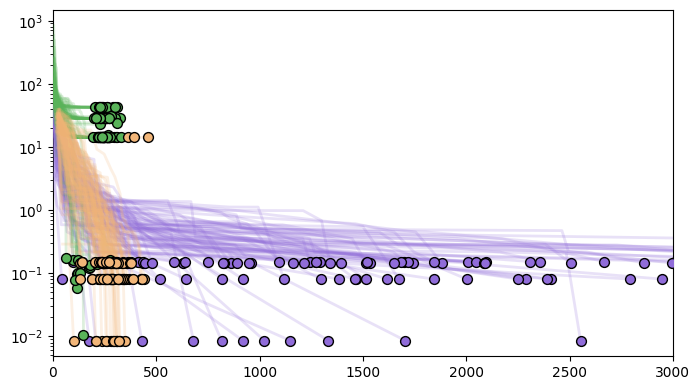

In [5]:
fig, ax = plt.subplots(figsize=(8, 4.5))
# ax.set_ylim(global_threshold * 0.9, 0.6)
ax.set_xlim(0, 3000)

draw_all_terminal = True

for exp_id, data in enumerate([grover_adaptive, cmaes, quads]):
    eval_hists = data["eval_hists"]
    min_val_hists = data["min_func_hists"]

    cum_evals = [np.cumsum(eval_hist) for eval_hist in eval_hists]
#     min_val_hists = [ np.clip(np.array(min_val_hist), global_threshold, None) for min_val_hist in min_val_hists]

    # seq_len = int(np.ceil(np.max(term_eval_nums)))

    ax.set_yscale('log')
    for i in range(len(eval_hists)):
        base_zorder = exp_id * 1000 + i
        r, g, b = [*color[exp_id]]
        ax.plot(cum_evals[i], min_val_hists[i], c=[r, g, b, 0.2], zorder=base_zorder, lw=2)
        
#         if draw_all_terminal or min_val_hists[i][-1] > global_threshold:
        ax.scatter([cum_evals[i][-1]], [min_val_hists[i][-1]],
            edgecolors=["black"], c=[[r, g, b]], s=50, #alpha=0.75,
            zorder=10000 + base_zorder)
